# Data Analysis

The notebook details the process of EDA and analysis of the merged datasets.

## Content (Visuals)
- heat map showing spearman(?) correlation
- bivariate Geographical map showing mh score and some impactful environmental feature at either the state or division
level, with indicators for states that have few rows in our cleaned dataset
- mental health scores for our city comparisons
- Maybe a pairplot(?) showing correlations between features but we need to decide which <10 features to include in that pairplot

In [1]:
# set up the environment
import numpy as np
import pandas as pd
import geopandas as gpd

# import modules
import map_module as map
import file_path as path

## MH Score vs Avg Greenness and Avg Precipitation
Using bi-variate map to present

In [2]:
# load the file paths
state_data = path.state_geo_file
merged_data = path.merged_data_file

### Avg Greenness

In [3]:
norm_df, colorlist = map.df_manipulation_for_bimap(
    state_data,
    merged_data,
    'Avg Greenness',
    ['State'],
    lefton="State",
    righton="STUSPS",
    mh_feature="MH_Score",
    percentile=np.linspace(0.33, 1, 3),
    color_list=["#ffb000", "#dc267f", "#648fff", "#785ef0"]
    )

state_df = norm_df.groupby(["State",'geometry']).mean().reset_index()
state_df = gpd.GeoDataFrame(state_df, geometry='geometry')
state_color_df = map.assign_color_cells(state_df,'Avg Greenness', env_color_01 = 'c1_env',
    mh_col = 'MH_Score',
    mh_color_02 = 'c2_mh',
    percentile=np.linspace(0.33, 1, 3),
)



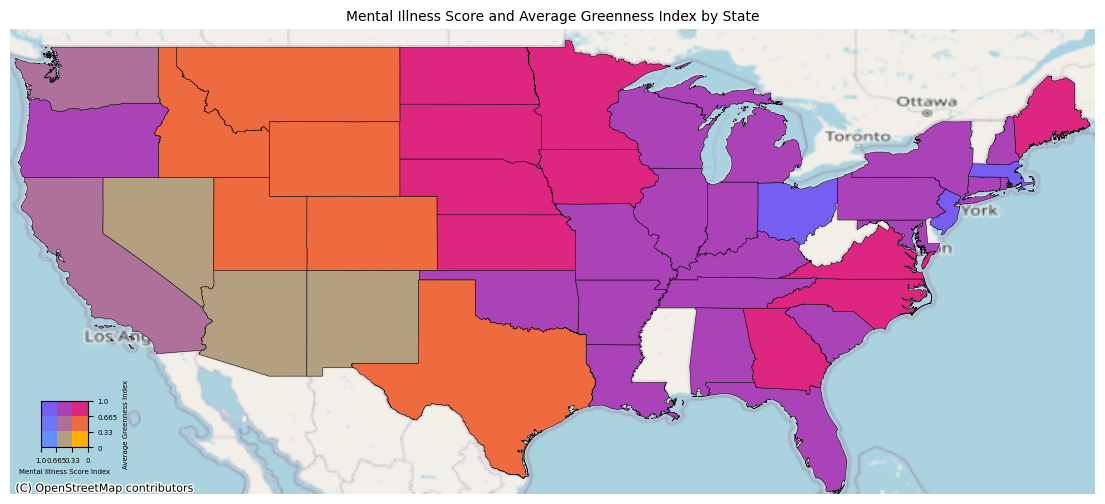

In [18]:
fig, ax = map.mat_subplots(1,1,fig_size = (14,20)) # 1,1 means 1 plot
map.matplotlib_map(ax,state_color_df, 'c1_env', 'c2_mh', colorlist, xlim= [-125,-66.7], ylim = [25,50], figsize = (20,20))

# adding color legend
map.bicolor_legend(ax, colorlist,percentile = np.linspace(0.33, 1, 3), legend_position = [0,0.1,0.1,0.1], tick_fontsize = 5, label_fontsize = 5, x_label = 'Mental Illness Score Index', y_label = 'Average Greenness Index')
map.set_off_axis(ax) # to remove axis
_ =ax.set_title('Mental Illness Score and Average Greenness Index by State', fontsize = 10)

### Avg Precipitation

In [5]:
norm_df_pre, _ = map.df_manipulation_for_bimap(
    state_data,
    merged_data,
    'Avg Precipitation',
    ['State'],
    lefton="State",
    righton="STUSPS",
    mh_feature="MH_Score",
    percentile=np.linspace(0.33, 1, 3),
    color_list=["#ffb000", "#dc267f", "#648fff", "#785ef0"]
    )

state_df_pre = norm_df_pre.groupby(["State",'geometry']).mean().reset_index()
state_df_pre = gpd.GeoDataFrame(state_df_pre, geometry='geometry')
state_color_df_pre = map.assign_color_cells(state_df_pre,'Avg Precipitation', env_color_01 = 'c1_env',
    mh_col = 'MH_Score',
    mh_color_02 = 'c2_mh',
    percentile=np.linspace(0.33, 1, 3),
)

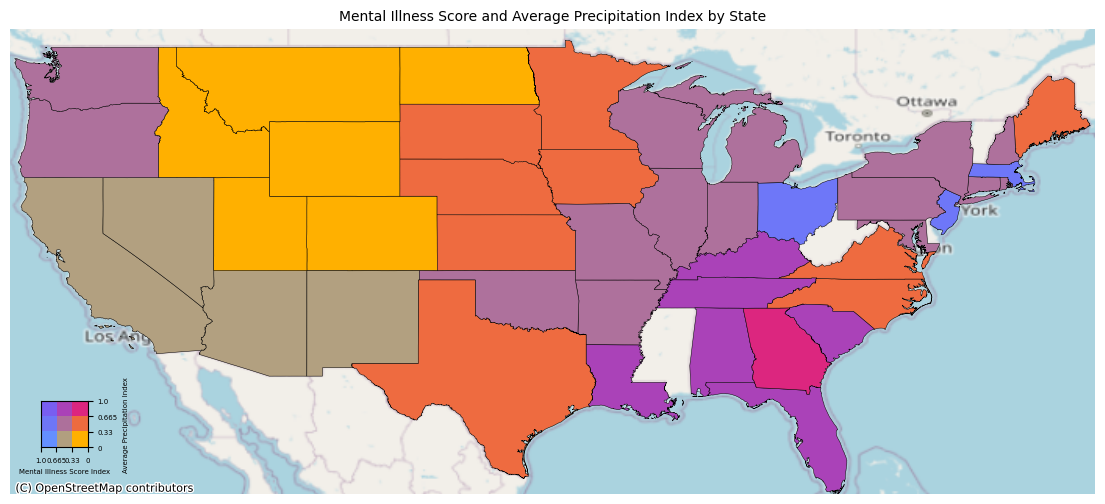

In [19]:
fig, ax = map.mat_subplots(1,1,fig_size = (14,20)) # 1,1 means 1 plot
map.matplotlib_map(ax,state_color_df_pre, 'c1_env', 'c2_mh', colorlist, xlim= [-125,-66.7], ylim = [25,50], figsize = (20,20))

# adding color legend
map.bicolor_legend(ax, colorlist,percentile = np.linspace(0.33, 1, 3), legend_position = [0,0.1,0.1,0.1], tick_fontsize = 5, label_fontsize = 5, x_label = 'Mental Illness Score Index', y_label = 'Average Precipitation Index')
map.set_off_axis(ax) # to remove axis
_ =ax.set_title('Mental Illness Score and Average Precipitation Index by State', fontsize = 10)

## Urban Centers with similar environmental features
visual will be multi subplots choropleth map that presenting their `mh_score` (aka Mental Illness Score)

In [9]:
# merge geo data with the merged data, return a normalized dataframe
geo_data = path.geo_us_file
mh_score_df, _ = map.df_manipulation_for_bimap(
    geo_data,
    merged_data,
    "Longitude",
    other_features=["State", "Urban Center"],
    lefton="UC_Grouping",
    righton="UC_Grouping",
    mh_feature="MH_Score",
    percentile=np.linspace(0.33, 1, 3),
    color_list=["#ffb000", "#dc267f", "#648fff", "#785ef0"]
    )


In [10]:
# preview the data
print(type(mh_score_df))
mh_score_df.head(2)

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry,MH_Score,Longitude,State,Urban Center
0,"MULTIPOLYGON (((-158.01244 21.42219, -157.9915...",0.052083,0.000000,HI,Honolulu
1,"MULTIPOLYGON (((-120.46375 34.98933, -120.4411...",0.656250,0.427609,CA,Santa Maria


In [11]:
# create color list for ledgend
# define the percentile
percentile=np.linspace(0.2, 1, 5)

c_lst = map.mono_mikhailsirenko_colorscale(
    percentile=percentile, color_list=["#0000FF", "#FF0000"]
)

In [12]:
# assign color to the data
color_df = map.mono_assign_color_cells(
    mh_score_df,
    mh_col="MH_Score",
    mh_color_02="mh_color",
    percentile=percentile,
)
color_df.sample(3)

,geometry,MH_Score,Longitude,State,Urban Center,mh_color
205,"MULTIPOLYGON (((-75.31007 40.75847, -75.26264 ...",0.562500,0.941576,PA,Allentown,2
174,"MULTIPOLYGON (((-85.59507 42.31970, -85.58303 ...",0.583333,0.825403,MI,Kalamazoo,2
57,"MULTIPOLYGON (((-111.99338 41.28934, -111.9814...",0.343750,0.524048,UT,Ogden,3


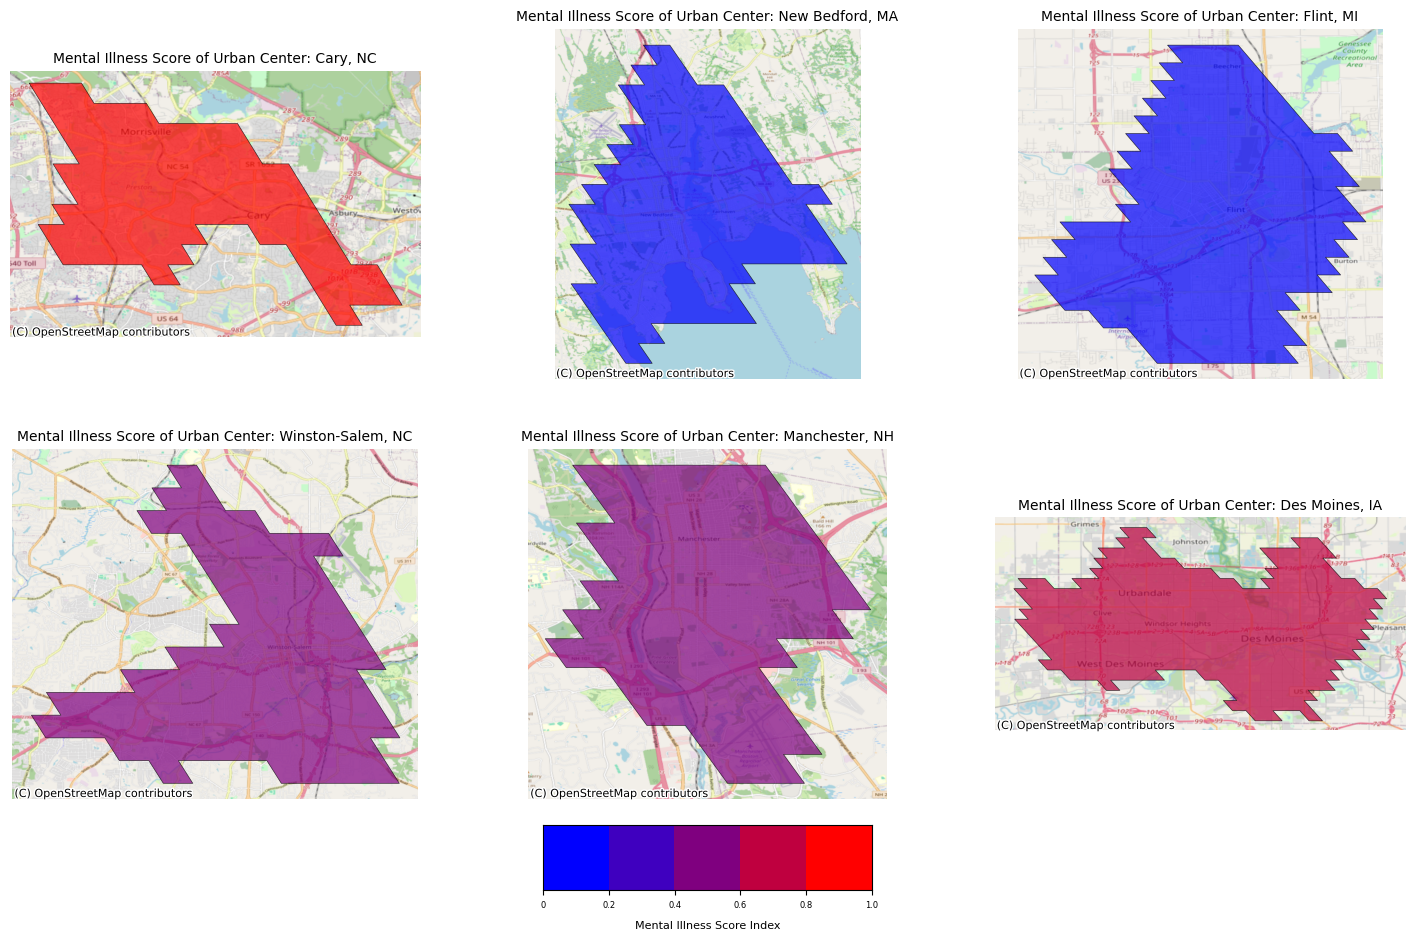

In [13]:
# define the urban center list, which included 6 urban centers
urban_center_lst = [
    "Cary",
    "New Bedford",
    "Flint",
    "Winston-Salem",
    "Manchester",
    "Des Moines",
]

# plot the map
map.one_function_monoMap(
    color_df,
    urban_center_lst,
    c_lst,
    fig_row=2,
    fig_col=3,
    fig_size=(18, 10),
    alpha=0.7,
    mh_color_02="mh_color",
    filter_col="Urban Center",
    edgecolor="black",
    linewidth=0.5,
    plot_title_fontsize=10,
    percentile=percentile,
    legend_position=[-1.1, -1, 0.8, 0.8],
    tick_fontsize=6,
    label_fontsize=8,
    legend_title="Mental Illness Score Index",
)